## 모듈 불러오기

In [1]:
import os
import catboost
import numpy as np
import pandas as pd
from glob import glob
import koreanize_matplotlib
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## 데이터 불러오기

In [2]:
base_path = './merge'

In [3]:
csv_list = os.listdir(base_path)

### train_lunch

In [4]:
dfs_, cols_ = [], []
for csv in csv_list:
    if 'train_lunch' in csv:
        df = pd.read_csv(f'{base_path}/{csv}')
        new_cols_ = list(set(df.columns) - set(cols_))
        cols_ += new_cols_
        dfs_.append(df[new_cols_])
train_lunch = pd.concat(dfs_, axis=1).drop(columns=['Unnamed: 0'])

In [5]:
train_lunch = train_lunch.drop(columns=['종류', '요일넘버'])

In [6]:
train_lunch.shape

(1205, 22)

In [7]:
train_lunch.columns

Index(['정원수', '출장자수', '식사가능인원', '공휴일전', '월', '휴가자수', '연차쓰기좋은날', '야근수', '공휴일후',
       '일', '국', '반찬1', '요일', '중식계', '재택근무자수', '메인메뉴범주_국물', '메인메뉴범주_구이',
       '메인메뉴범주_조림', '메인메뉴범주_찜', '메인메뉴범주_볶음', '메인메뉴범주_튀김', '메인메뉴범주_샐러드'],
      dtype='object')

In [8]:
train_lunch.head()

,정원수,출장자수,식사가능인원,공휴일전,월,휴가자수,연차쓰기좋은날,야근수,공휴일후,일,...,요일,중식계,재택근무자수,메인메뉴범주_국물,메인메뉴범주_구이,메인메뉴범주_조림,메인메뉴범주_찜,메인메뉴범주_볶음,메인메뉴범주_튀김,메인메뉴범주_샐러드
0,2601,150,2401.0,0,2,50,0,238,0,1,...,1,1039,0,0,0,0,0,1,0,0
1,2601,173,2378.0,0,2,50,0,319,0,2,...,2,867,0,0,0,0,0,0,1,0
2,2601,180,2365.0,0,2,56,0,111,0,3,...,3,1017,0,0,0,0,0,0,1,0
3,2601,220,2277.0,0,2,104,0,355,0,4,...,4,978,0,0,0,0,0,1,0,0
4,2601,181,2142.0,1,2,278,1,34,0,5,...,5,925,0,0,0,0,0,0,1,0


### train_dinner

In [9]:
dfs_, cols_ = [], []
for csv in csv_list:
    if 'train_dinner' in csv:
        df = pd.read_csv(f'{base_path}/{csv}')
        new_cols_ = list(set(df.columns) - set(cols_))
        cols_ += new_cols_
        dfs_.append(df[new_cols_])
train_dinner = pd.concat(dfs_, axis=1).drop(columns=['Unnamed: 0'])

In [10]:
train_dinner = train_dinner.drop(columns=['일자', '종류'])

In [11]:
train_dinner.shape

(1161, 23)

In [12]:
train_dinner.columns

Index(['출장자수', '식사가능인원', '공휴일전', '월', '일', '연차쓰기좋은날', '야근수', '공휴일후', '국',
       '정원수', '요일', '반찬1', '휴가자수', '석식계', '재택근무자수', '메인메뉴범주_국물', '메인메뉴범주_구이',
       '메인메뉴범주_조림', '메인메뉴범주_찜', '연', '메인메뉴범주_볶음', '메인메뉴범주_튀김', '메인메뉴범주_샐러드'],
      dtype='object')

In [13]:
train_dinner.head()

,출장자수,식사가능인원,공휴일전,월,일,연차쓰기좋은날,야근수,공휴일후,국,정원수,...,석식계,재택근무자수,메인메뉴범주_국물,메인메뉴범주_구이,메인메뉴범주_조림,메인메뉴범주_찜,연,메인메뉴범주_볶음,메인메뉴범주_튀김,메인메뉴범주_샐러드
0,150,2401.0,0,2,1,0,238,0,3,2601,...,331,0,0,1,0,0,2016,0,0,0
1,173,2378.0,0,2,2,0,319,0,5,2601,...,560,0,0,0,1,0,2016,0,0,0
2,180,2365.0,0,2,3,0,111,0,4,2601,...,573,0,0,1,0,0,2016,0,0,0
3,220,2277.0,0,2,4,0,355,0,2,2601,...,525,0,0,0,0,0,2016,0,0,1
4,181,2142.0,1,2,5,1,34,0,3,2601,...,330,0,0,0,0,0,2016,1,0,0


### test_lunch

In [14]:
dfs_, cols_ = [], []
for csv in csv_list:
    if 'test_lunch' in csv:
        df = pd.read_csv(f'{base_path}/{csv}')
        new_cols_ = list(set(df.columns) - set(cols_))
        cols_ += new_cols_
        dfs_.append(df[new_cols_])
test_lunch = pd.concat(dfs_, axis=1).drop(columns=['Unnamed: 0'])

In [15]:
test_lunch = test_lunch.drop(columns=['종류', '요일넘버'])

In [16]:
test_lunch.shape

(50, 21)

In [17]:
test_lunch.columns

Index(['정원수', '출장자수', '식사가능인원', '공휴일전', '월', '휴가자수', '연차쓰기좋은날', '야근수', '공휴일후',
       '국', '반찬1', '요일', '재택근무자수', '메인메뉴범주_국물', '메인메뉴범주_구이', '메인메뉴범주_조림',
       '메인메뉴범주_찜', '메인메뉴범주_볶음', '메인메뉴범주_튀김', '메인메뉴범주_샐러드', '일'],
      dtype='object')

In [18]:
test_lunch.head()

,정원수,출장자수,식사가능인원,공휴일전,월,휴가자수,연차쓰기좋은날,야근수,공휴일후,국,...,요일,재택근무자수,메인메뉴범주_국물,메인메뉴범주_구이,메인메뉴범주_조림,메인메뉴범주_찜,메인메뉴범주_볶음,메인메뉴범주_튀김,메인메뉴범주_샐러드,일
0,2983,182,2355.0,0,1,88,0,5,0,5,...,3,358,0,0,0,1,0,0,0,27
1,2983,212,2319.0,0,1,104,0,409,0,4,...,4,348,0,0,0,0,1,0,0,28
2,2983,249,2170.0,0,1,270,0,0,0,4,...,5,294,0,0,0,0,0,1,0,29
3,2924,154,2340.0,0,2,108,0,538,0,4,...,1,322,0,0,0,0,1,0,0,1
4,2924,186,2362.0,0,2,62,0,455,0,4,...,2,314,0,0,1,0,0,0,0,2


### test_dinner

In [19]:
dfs_, cols_ = [], []
for csv in csv_list:
    if 'test_dinner' in csv:
        df = pd.read_csv(f'{base_path}/{csv}')
        new_cols_ = list(set(df.columns) - set(cols_))
        cols_ += new_cols_
        dfs_.append(df[new_cols_])
test_dinner = pd.concat(dfs_, axis=1).drop(columns=['Unnamed: 0'])

In [20]:
test_dinner = test_dinner.rename(columns={
    'd_종류' : '종류', 
})

In [21]:
test_dinner = test_dinner.drop(columns=['종류'])

In [22]:
test_dinner.shape

(50, 22)

In [23]:
test_dinner.columns

Index(['요일', '메인메뉴범주_구이', '식사가능인원', '메인메뉴범주_찜', '공휴일전', '휴가자수', '메인메뉴범주_샐러드',
       '메인메뉴범주_튀김', '연차쓰기좋은날', '야근수', '공휴일후', '국', '반찬1', '정원수', '메인메뉴범주_국물',
       '출장자수', '메인메뉴범주_조림', '연', '메인메뉴범주_볶음', '월', '일', '재택근무자수'],
      dtype='object')

In [24]:
test_dinner.head()

,요일,메인메뉴범주_구이,식사가능인원,메인메뉴범주_찜,공휴일전,휴가자수,메인메뉴범주_샐러드,메인메뉴범주_튀김,연차쓰기좋은날,야근수,...,반찬1,정원수,메인메뉴범주_국물,출장자수,메인메뉴범주_조림,연,메인메뉴범주_볶음,월,일,재택근무자수
0,3,0,2355.0,0,0,88,0,0,0,5,...,8,2983,0,182,0,2021,1,1,27,358
1,4,0,2319.0,0,0,104,1,0,0,409,...,2,2983,0,212,0,2021,0,1,28,348
2,5,0,2170.0,1,0,270,0,0,0,0,...,5,2983,0,249,0,2021,0,1,29,294
3,1,0,2340.0,0,0,108,0,0,0,538,...,7,2924,0,154,1,2021,0,2,1,322
4,2,0,2362.0,0,0,62,0,0,0,455,...,8,2924,0,186,0,2021,1,2,2,314


### 파일 저장

In [25]:
# train_lunch.to_csv('./merge/merged_train_lunch.csv', index=False)
# train_dinner.to_csv('./merge/merged_train_dinner.csv', index=False)
# test_lunch.to_csv('./merge/merged_test_lunch.csv', index=False)
# test_dinner.to_csv('./merge/merged_test_dinner.csv', index=False)

## 데이터 전처리

In [26]:
train_lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   정원수         1205 non-null   int64  
 1   출장자수        1205 non-null   int64  
 2   식사가능인원      1205 non-null   float64
 3   공휴일전        1205 non-null   int64  
 4   월           1205 non-null   int64  
 5   휴가자수        1205 non-null   int64  
 6   연차쓰기좋은날     1205 non-null   int64  
 7   야근수         1205 non-null   int64  
 8   공휴일후        1205 non-null   int64  
 9   일           1205 non-null   int64  
 10  국           1205 non-null   int64  
 11  반찬1         1205 non-null   int64  
 12  요일          1205 non-null   int64  
 13  중식계         1205 non-null   int64  
 14  재택근무자수      1205 non-null   int64  
 15  메인메뉴범주_국물   1205 non-null   int64  
 16  메인메뉴범주_구이   1205 non-null   int64  
 17  메인메뉴범주_조림   1205 non-null   int64  
 18  메인메뉴범주_찜    1205 non-null   int64  
 19  메인메뉴범주_볶음   1205 non-null  

In [27]:
train_dinner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   출장자수        1161 non-null   int64  
 1   식사가능인원      1161 non-null   float64
 2   공휴일전        1161 non-null   int64  
 3   월           1161 non-null   int64  
 4   일           1161 non-null   int64  
 5   연차쓰기좋은날     1161 non-null   int64  
 6   야근수         1161 non-null   int64  
 7   공휴일후        1161 non-null   int64  
 8   국           1161 non-null   int64  
 9   정원수         1161 non-null   int64  
 10  요일          1161 non-null   int64  
 11  반찬1         1161 non-null   int64  
 12  휴가자수        1161 non-null   int64  
 13  석식계         1161 non-null   int64  
 14  재택근무자수      1161 non-null   int64  
 15  메인메뉴범주_국물   1161 non-null   int64  
 16  메인메뉴범주_구이   1161 non-null   int64  
 17  메인메뉴범주_조림   1161 non-null   int64  
 18  메인메뉴범주_찜    1161 non-null   int64  
 19  연           1161 non-null  

In [28]:
test_lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   정원수         50 non-null     int64  
 1   출장자수        50 non-null     int64  
 2   식사가능인원      50 non-null     float64
 3   공휴일전        50 non-null     int64  
 4   월           50 non-null     int64  
 5   휴가자수        50 non-null     int64  
 6   연차쓰기좋은날     50 non-null     int64  
 7   야근수         50 non-null     int64  
 8   공휴일후        50 non-null     int64  
 9   국           50 non-null     int64  
 10  반찬1         50 non-null     int64  
 11  요일          50 non-null     int64  
 12  재택근무자수      50 non-null     int64  
 13  메인메뉴범주_국물   50 non-null     int64  
 14  메인메뉴범주_구이   50 non-null     int64  
 15  메인메뉴범주_조림   50 non-null     int64  
 16  메인메뉴범주_찜    50 non-null     int64  
 17  메인메뉴범주_볶음   50 non-null     int64  
 18  메인메뉴범주_튀김   50 non-null     int64  
 19  메인메뉴범주_샐러드  50 non-null     int

In [29]:
test_dinner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   요일          50 non-null     int64  
 1   메인메뉴범주_구이   50 non-null     int64  
 2   식사가능인원      50 non-null     float64
 3   메인메뉴범주_찜    50 non-null     int64  
 4   공휴일전        50 non-null     int64  
 5   휴가자수        50 non-null     int64  
 6   메인메뉴범주_샐러드  50 non-null     int64  
 7   메인메뉴범주_튀김   50 non-null     int64  
 8   연차쓰기좋은날     50 non-null     int64  
 9   야근수         50 non-null     int64  
 10  공휴일후        50 non-null     int64  
 11  국           50 non-null     int64  
 12  반찬1         50 non-null     int64  
 13  정원수         50 non-null     int64  
 14  메인메뉴범주_국물   50 non-null     int64  
 15  출장자수        50 non-null     int64  
 16  메인메뉴범주_조림   50 non-null     int64  
 17  연           50 non-null     int64  
 18  메인메뉴범주_볶음   50 non-null     int64  
 19  월           50 non-null     int

## Feture Engineering

In [30]:
label_lunch, label_dinner = '중식계', '석식계'

In [87]:
# feature_lunch = list(train_lunch.drop(columns=[label_lunch]).columns)
# feature_dinner = list(train_dinner.drop(columns=[label_dinner]).columns)

feature_lunch = [
    '월', '일', '요일', '공휴일전', '공휴일후', '연차쓰기좋은날', '식사가능인원',
    '야근수', '휴가자수', '재택근무자수', '출장자수', '반찬1', '국', '메인메뉴범주_볶음'
]
feature_dinner = [
    '월', '일', '요일', '공휴일전', '공휴일후', '연차쓰기좋은날', '식사가능인원', 
    '야근수', '휴가자수', '재택근무자수', '출장자수', '반찬1', '국', '메인메뉴범주_볶음'
]

In [88]:
print(feature_lunch)

['월', '일', '요일', '공휴일전', '공휴일후', '연차쓰기좋은날', '식사가능인원', '야근수', '휴가자수', '재택근무자수', '출장자수', '반찬1', '국', '메인메뉴범주_볶음']


In [89]:
print(feature_dinner)

['월', '일', '요일', '공휴일전', '공휴일후', '연차쓰기좋은날', '식사가능인원', '야근수', '휴가자수', '재택근무자수', '출장자수', '반찬1', '국', '메인메뉴범주_볶음']


## Train-Test-Split

In [90]:
# train_test_split?

### lunch split

In [91]:
X_train_lunch, X_test_lunch, y_train_lunch, y_test_lunch = train_test_split(
    train_lunch[feature_lunch], train_lunch[label_lunch], test_size=0.1, random_state=42)

In [92]:
X_train_lunch.shape, X_test_lunch.shape, y_train_lunch.shape, y_test_lunch.shape

((1084, 14), (121, 14), (1084,), (121,))

### dinner split

In [93]:
X_train_dinner, X_test_dinner, y_train_dinner, y_test_dinner = train_test_split(
    train_dinner[feature_dinner], train_dinner[label_dinner], test_size=0.1, random_state=42)

In [94]:
X_train_dinner.shape, X_test_dinner.shape, y_train_dinner.shape, y_test_dinner.shape

((1044, 14), (117, 14), (1044,), (117,))

## Catboost + GridSearchCV + Cross Validation

### GridSearchCV Parameter 설정

In [95]:
set_n_estimators = list(range(250, 610, 20))
print(set_n_estimators)

[250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590]


In [96]:
set_learning_rate = [lr / 100 for lr in list(range(1, 100, 1))]
print(set_learning_rate)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]


In [97]:
param_grid = {
    'n_estimators': set_n_estimators,
    'learning_rate': set_learning_rate
}
print(param_grid)

{'n_estimators': [250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]}


### lunch model

In [98]:
lunch_model = catboost.CatBoostRegressor(
    eval_metric='MAE',
    random_state=42,
    logging_level='Silent',
    early_stopping_rounds=200
)

In [99]:
lunch_result = lunch_model.grid_search(
    param_grid=param_grid,
    X=X_train_lunch,
    y=y_train_lunch,
    cv=10
)
lunch_result

0:	loss: 116.3005821	best: 116.3005821 (0)	total: 495ms	remaining: 14m 42s
1:	loss: 76.7172568	best: 76.7172568 (1)	total: 970ms	remaining: 14m 22s
2:	loss: 73.1972576	best: 73.1972576 (2)	total: 1.58s	remaining: 15m 39s
3:	loss: 71.5652893	best: 71.5652893 (3)	total: 2s	remaining: 14m 47s
4:	loss: 71.2474550	best: 71.2474550 (4)	total: 2.22s	remaining: 13m 10s
5:	loss: 70.0887792	best: 70.0887792 (5)	total: 2.63s	remaining: 12m 59s
6:	loss: 70.9602394	best: 70.0887792 (5)	total: 3.08s	remaining: 13m 1s
7:	loss: 70.5782446	best: 70.0887792 (5)	total: 3.54s	remaining: 13m 4s
8:	loss: 70.8896889	best: 70.0887792 (5)	total: 4s	remaining: 13m 8s
9:	loss: 70.1276216	best: 70.0887792 (5)	total: 4.38s	remaining: 12m 56s
10:	loss: 72.0052428	best: 70.0887792 (5)	total: 4.81s	remaining: 12m 54s
11:	loss: 72.6886662	best: 70.0887792 (5)	total: 5.26s	remaining: 12m 56s
12:	loss: 74.4418024	best: 70.0887792 (5)	total: 5.58s	remaining: 12m 39s
13:	loss: 73.3417628	best: 70.0887792 (5)	total: 6s	rem

112:	loss: 73.3417628	best: 69.8830227 (108)	total: 38.1s	remaining: 9m 22s
113:	loss: 73.6336785	best: 69.8830227 (108)	total: 38.5s	remaining: 9m 22s
114:	loss: 72.5094564	best: 69.8830227 (108)	total: 38.8s	remaining: 9m 23s
115:	loss: 72.9212586	best: 69.8830227 (108)	total: 39.3s	remaining: 9m 23s
116:	loss: 70.4747027	best: 69.8830227 (108)	total: 39.8s	remaining: 9m 25s
117:	loss: 74.1740930	best: 69.8830227 (108)	total: 40.2s	remaining: 9m 27s
118:	loss: 74.9049608	best: 69.8830227 (108)	total: 40.7s	remaining: 9m 28s
119:	loss: 73.2876970	best: 69.8830227 (108)	total: 41.2s	remaining: 9m 30s
120:	loss: 72.3121360	best: 69.8830227 (108)	total: 41.7s	remaining: 9m 31s
121:	loss: 71.7682561	best: 69.8830227 (108)	total: 42.1s	remaining: 9m 33s
122:	loss: 71.2085968	best: 69.8830227 (108)	total: 42.5s	remaining: 9m 33s
123:	loss: 72.1650681	best: 69.8830227 (108)	total: 43s	remaining: 9m 34s
124:	loss: 75.0848097	best: 69.8830227 (108)	total: 43.5s	remaining: 9m 37s
125:	loss: 74.

221:	loss: 71.2085968	best: 69.6603395 (207)	total: 1m 17s	remaining: 9m 4s
222:	loss: 72.1650681	best: 69.6603395 (207)	total: 1m 17s	remaining: 9m 4s
223:	loss: 75.0848097	best: 69.6603395 (207)	total: 1m 18s	remaining: 9m 4s
224:	loss: 74.0186871	best: 69.6603395 (207)	total: 1m 18s	remaining: 9m 3s
225:	loss: 74.7349022	best: 69.6603395 (207)	total: 1m 18s	remaining: 9m 3s
226:	loss: 73.1496104	best: 69.6603395 (207)	total: 1m 19s	remaining: 9m 3s
227:	loss: 74.7056781	best: 69.6603395 (207)	total: 1m 19s	remaining: 9m 2s
228:	loss: 73.6465071	best: 69.6603395 (207)	total: 1m 19s	remaining: 9m 2s
229:	loss: 76.2004301	best: 69.6603395 (207)	total: 1m 20s	remaining: 9m 2s
230:	loss: 75.3268676	best: 69.6603395 (207)	total: 1m 20s	remaining: 9m 1s
231:	loss: 72.0036456	best: 69.6603395 (207)	total: 1m 21s	remaining: 9m 1s
232:	loss: 73.1461760	best: 69.6603395 (207)	total: 1m 21s	remaining: 9m
233:	loss: 72.5861396	best: 69.6603395 (207)	total: 1m 21s	remaining: 9m
234:	loss: 72.4687

328:	loss: 76.2004301	best: 69.4421937 (306)	total: 1m 52s	remaining: 8m 18s
329:	loss: 75.3268676	best: 69.4421937 (306)	total: 1m 53s	remaining: 8m 18s
330:	loss: 72.0036456	best: 69.4421937 (306)	total: 1m 53s	remaining: 8m 18s
331:	loss: 73.1461760	best: 69.4421937 (306)	total: 1m 53s	remaining: 8m 17s
332:	loss: 72.5861396	best: 69.4421937 (306)	total: 1m 54s	remaining: 8m 17s
333:	loss: 72.4687061	best: 69.4421937 (306)	total: 1m 54s	remaining: 8m 16s
334:	loss: 71.8216739	best: 69.4421937 (306)	total: 1m 54s	remaining: 8m 16s
335:	loss: 73.0483989	best: 69.4421937 (306)	total: 1m 55s	remaining: 8m 15s
336:	loss: 72.0252517	best: 69.4421937 (306)	total: 1m 55s	remaining: 8m 15s
337:	loss: 75.3730282	best: 69.4421937 (306)	total: 1m 56s	remaining: 8m 16s
338:	loss: 70.2729402	best: 69.4421937 (306)	total: 1m 56s	remaining: 8m 16s
339:	loss: 73.2228498	best: 69.4421937 (306)	total: 1m 57s	remaining: 8m 16s
340:	loss: 75.2785912	best: 69.4421937 (306)	total: 1m 57s	remaining: 8m 16s

436:	loss: 75.3730282	best: 69.4421937 (306)	total: 2m 30s	remaining: 7m 42s
437:	loss: 70.2729402	best: 69.4421937 (306)	total: 2m 30s	remaining: 7m 42s
438:	loss: 73.2228498	best: 69.4421937 (306)	total: 2m 30s	remaining: 7m 41s
439:	loss: 75.2785912	best: 69.4421937 (306)	total: 2m 31s	remaining: 7m 41s
440:	loss: 71.5823844	best: 69.4421937 (306)	total: 2m 31s	remaining: 7m 40s
441:	loss: 73.8546032	best: 69.4421937 (306)	total: 2m 31s	remaining: 7m 40s
442:	loss: 71.9034391	best: 69.4421937 (306)	total: 2m 32s	remaining: 7m 39s
443:	loss: 73.6370240	best: 69.4421937 (306)	total: 2m 32s	remaining: 7m 39s
444:	loss: 73.0254829	best: 69.4421937 (306)	total: 2m 32s	remaining: 7m 39s
445:	loss: 74.0750224	best: 69.4421937 (306)	total: 2m 33s	remaining: 7m 38s
446:	loss: 74.2455376	best: 69.4421937 (306)	total: 2m 33s	remaining: 7m 38s
447:	loss: 76.2132491	best: 69.4421937 (306)	total: 2m 33s	remaining: 7m 37s
448:	loss: 73.0374655	best: 69.4421937 (306)	total: 2m 34s	remaining: 7m 37s

543:	loss: 73.0254829	best: 69.4421937 (306)	total: 3m 8s	remaining: 7m 8s
544:	loss: 74.0750224	best: 69.4421937 (306)	total: 3m 8s	remaining: 7m 8s
545:	loss: 74.2455376	best: 69.4421937 (306)	total: 3m 8s	remaining: 7m 7s
546:	loss: 76.2132491	best: 69.4421937 (306)	total: 3m 9s	remaining: 7m 7s
547:	loss: 73.0374655	best: 69.4421937 (306)	total: 3m 9s	remaining: 7m 7s
548:	loss: 77.3102411	best: 69.4421937 (306)	total: 3m 9s	remaining: 7m 6s
549:	loss: 76.4142826	best: 69.4421937 (306)	total: 3m 10s	remaining: 7m 6s
550:	loss: 76.0505992	best: 69.4421937 (306)	total: 3m 10s	remaining: 7m 5s
551:	loss: 75.2595003	best: 69.4421937 (306)	total: 3m 10s	remaining: 7m 5s
552:	loss: 76.6543059	best: 69.4421937 (306)	total: 3m 11s	remaining: 7m 4s
553:	loss: 74.7839468	best: 69.4421937 (306)	total: 3m 11s	remaining: 7m 4s
554:	loss: 73.4671773	best: 69.4421937 (306)	total: 3m 11s	remaining: 7m 3s
555:	loss: 73.5744942	best: 69.4421937 (306)	total: 3m 12s	remaining: 7m 3s
556:	loss: 73.5633

650:	loss: 75.2595003	best: 69.4421937 (306)	total: 3m 45s	remaining: 6m 32s
651:	loss: 76.6543059	best: 69.4421937 (306)	total: 3m 46s	remaining: 6m 32s
652:	loss: 74.7839468	best: 69.4421937 (306)	total: 3m 46s	remaining: 6m 31s
653:	loss: 73.4671773	best: 69.4421937 (306)	total: 3m 46s	remaining: 6m 31s
654:	loss: 73.5744942	best: 69.4421937 (306)	total: 3m 47s	remaining: 6m 30s
655:	loss: 73.5633253	best: 69.4421937 (306)	total: 3m 47s	remaining: 6m 30s
656:	loss: 78.9893282	best: 69.4421937 (306)	total: 3m 47s	remaining: 6m 30s
657:	loss: 72.2065343	best: 69.4421937 (306)	total: 3m 48s	remaining: 6m 29s
658:	loss: 77.5514189	best: 69.4421937 (306)	total: 3m 48s	remaining: 6m 29s
659:	loss: 78.2694331	best: 69.4421937 (306)	total: 3m 48s	remaining: 6m 29s
660:	loss: 76.8501507	best: 69.4421937 (306)	total: 3m 49s	remaining: 6m 28s
661:	loss: 77.2564913	best: 69.4421937 (306)	total: 3m 49s	remaining: 6m 28s
662:	loss: 81.7036052	best: 69.4421937 (306)	total: 3m 49s	remaining: 6m 28s

757:	loss: 77.5514189	best: 69.4421937 (306)	total: 4m 27s	remaining: 6m 1s
758:	loss: 78.2694331	best: 69.4421937 (306)	total: 4m 27s	remaining: 6m
759:	loss: 76.8501507	best: 69.4421937 (306)	total: 4m 27s	remaining: 6m
760:	loss: 77.2564913	best: 69.4421937 (306)	total: 4m 28s	remaining: 5m 59s
761:	loss: 81.7036052	best: 69.4421937 (306)	total: 4m 28s	remaining: 5m 59s
762:	loss: 80.9307595	best: 69.4421937 (306)	total: 4m 28s	remaining: 5m 58s
763:	loss: 79.2349407	best: 69.4421937 (306)	total: 4m 28s	remaining: 5m 58s
764:	loss: 77.5992402	best: 69.4421937 (306)	total: 4m 29s	remaining: 5m 57s
765:	loss: 79.7404541	best: 69.4421937 (306)	total: 4m 29s	remaining: 5m 57s
766:	loss: 79.0019066	best: 69.4421937 (306)	total: 4m 29s	remaining: 5m 57s
767:	loss: 78.1998303	best: 69.4421937 (306)	total: 4m 30s	remaining: 5m 56s
768:	loss: 76.5045421	best: 69.4421937 (306)	total: 4m 30s	remaining: 5m 56s
769:	loss: 72.6549478	best: 69.4421937 (306)	total: 4m 30s	remaining: 5m 55s
770:	los

864:	loss: 79.7404541	best: 69.4421937 (306)	total: 5m 3s	remaining: 5m 22s
865:	loss: 79.0019066	best: 69.4421937 (306)	total: 5m 4s	remaining: 5m 21s
866:	loss: 78.1998303	best: 69.4421937 (306)	total: 5m 4s	remaining: 5m 21s
867:	loss: 76.5045421	best: 69.4421937 (306)	total: 5m 4s	remaining: 5m 20s
868:	loss: 72.6549478	best: 69.4421937 (306)	total: 5m 4s	remaining: 5m 20s
869:	loss: 76.9945609	best: 69.4421937 (306)	total: 5m 5s	remaining: 5m 19s
870:	loss: 73.7498457	best: 69.4421937 (306)	total: 5m 5s	remaining: 5m 19s
871:	loss: 74.8511257	best: 69.4421937 (306)	total: 5m 5s	remaining: 5m 19s
872:	loss: 79.8221529	best: 69.4421937 (306)	total: 5m 5s	remaining: 5m 18s
873:	loss: 75.1931834	best: 69.4421937 (306)	total: 5m 6s	remaining: 5m 18s
874:	loss: 76.2759217	best: 69.4421937 (306)	total: 5m 6s	remaining: 5m 17s
875:	loss: 77.5642831	best: 69.4421937 (306)	total: 5m 6s	remaining: 5m 17s
876:	loss: 76.3269375	best: 69.4421937 (306)	total: 5m 7s	remaining: 5m 16s
877:	loss: 7

972:	loss: 75.1931834	best: 69.4421937 (306)	total: 5m 42s	remaining: 4m 44s
973:	loss: 76.2759217	best: 69.4421937 (306)	total: 5m 42s	remaining: 4m 44s
974:	loss: 77.5642831	best: 69.4421937 (306)	total: 5m 43s	remaining: 4m 44s
975:	loss: 76.3269375	best: 69.4421937 (306)	total: 5m 43s	remaining: 4m 43s
976:	loss: 76.5071840	best: 69.4421937 (306)	total: 5m 43s	remaining: 4m 43s
977:	loss: 75.8874539	best: 69.4421937 (306)	total: 5m 43s	remaining: 4m 42s
978:	loss: 72.7432286	best: 69.4421937 (306)	total: 5m 44s	remaining: 4m 42s
979:	loss: 81.3173670	best: 69.4421937 (306)	total: 5m 44s	remaining: 4m 41s
980:	loss: 86.6779955	best: 69.4421937 (306)	total: 5m 44s	remaining: 4m 41s
981:	loss: 86.1931378	best: 69.4421937 (306)	total: 5m 44s	remaining: 4m 41s
982:	loss: 87.4082322	best: 69.4421937 (306)	total: 5m 45s	remaining: 4m 40s
983:	loss: 84.1144614	best: 69.4421937 (306)	total: 5m 45s	remaining: 4m 40s
984:	loss: 85.0264899	best: 69.4421937 (306)	total: 5m 45s	remaining: 4m 39s

1078:	loss: 81.3173670	best: 69.4421937 (306)	total: 6m 18s	remaining: 4m 6s
1079:	loss: 86.6779955	best: 69.4421937 (306)	total: 6m 18s	remaining: 4m 6s
1080:	loss: 86.1931378	best: 69.4421937 (306)	total: 6m 19s	remaining: 4m 5s
1081:	loss: 87.4082322	best: 69.4421937 (306)	total: 6m 19s	remaining: 4m 5s
1082:	loss: 84.1144614	best: 69.4421937 (306)	total: 6m 19s	remaining: 4m 5s
1083:	loss: 85.0264899	best: 69.4421937 (306)	total: 6m 20s	remaining: 4m 4s
1084:	loss: 83.5602055	best: 69.4421937 (306)	total: 6m 20s	remaining: 4m 4s
1085:	loss: 79.2745860	best: 69.4421937 (306)	total: 6m 20s	remaining: 4m 4s
1086:	loss: 79.2736861	best: 69.4421937 (306)	total: 6m 21s	remaining: 4m 3s
1087:	loss: 79.8758947	best: 69.4421937 (306)	total: 6m 21s	remaining: 4m 3s
1088:	loss: 83.3080269	best: 69.4421937 (306)	total: 6m 22s	remaining: 4m 3s
1089:	loss: 78.5362043	best: 69.4421937 (306)	total: 6m 22s	remaining: 4m 3s
1090:	loss: 70.4393186	best: 69.4421937 (306)	total: 6m 23s	remaining: 4m 2s

1184:	loss: 79.2745860	best: 69.4421937 (306)	total: 6m 57s	remaining: 3m 30s
1185:	loss: 79.2736861	best: 69.4421937 (306)	total: 6m 57s	remaining: 3m 30s
1186:	loss: 79.8758947	best: 69.4421937 (306)	total: 6m 58s	remaining: 3m 29s
1187:	loss: 83.3080269	best: 69.4421937 (306)	total: 6m 58s	remaining: 3m 29s
1188:	loss: 77.6929570	best: 69.4421937 (306)	total: 6m 59s	remaining: 3m 29s
1189:	loss: 70.2134491	best: 69.4421937 (306)	total: 6m 59s	remaining: 3m 28s
1190:	loss: 69.8198948	best: 69.4421937 (306)	total: 7m	remaining: 3m 28s
1191:	loss: 69.7677767	best: 69.4421937 (306)	total: 7m	remaining: 3m 28s
1192:	loss: 70.4009732	best: 69.4421937 (306)	total: 7m 1s	remaining: 3m 28s
1193:	loss: 69.8652444	best: 69.4421937 (306)	total: 7m 1s	remaining: 3m 27s
1194:	loss: 70.6791845	best: 69.4421937 (306)	total: 7m 2s	remaining: 3m 27s
1195:	loss: 70.5782446	best: 69.4421937 (306)	total: 7m 2s	remaining: 3m 27s
1196:	loss: 70.8896889	best: 69.4421937 (306)	total: 7m 3s	remaining: 3m 26s

1290:	loss: 69.7677767	best: 69.4421937 (306)	total: 7m 35s	remaining: 2m 53s
1291:	loss: 70.4009732	best: 69.4421937 (306)	total: 7m 36s	remaining: 2m 52s
1292:	loss: 69.8652444	best: 69.4421937 (306)	total: 7m 37s	remaining: 2m 52s
1293:	loss: 70.6791845	best: 69.4421937 (306)	total: 7m 37s	remaining: 2m 52s
1294:	loss: 70.5782446	best: 69.4421937 (306)	total: 7m 38s	remaining: 2m 52s
1295:	loss: 70.8896889	best: 69.4421937 (306)	total: 7m 38s	remaining: 2m 52s
1296:	loss: 69.4421937	best: 69.4421937 (306)	total: 7m 39s	remaining: 2m 51s
1297:	loss: 72.0052428	best: 69.4421937 (306)	total: 7m 40s	remaining: 2m 51s
1298:	loss: 72.6886662	best: 69.4421937 (306)	total: 7m 40s	remaining: 2m 51s
1299:	loss: 74.4418024	best: 69.4421937 (306)	total: 7m 40s	remaining: 2m 50s
1300:	loss: 73.3417628	best: 69.4421937 (306)	total: 7m 41s	remaining: 2m 50s
1301:	loss: 73.6336785	best: 69.4421937 (306)	total: 7m 41s	remaining: 2m 50s
1302:	loss: 71.9903322	best: 69.4421937 (306)	total: 7m 42s	rema

1396:	loss: 72.0052428	best: 69.4421937 (306)	total: 8m 16s	remaining: 2m 16s
1397:	loss: 72.6886662	best: 69.4421937 (306)	total: 8m 17s	remaining: 2m 16s
1398:	loss: 74.4418024	best: 69.4421937 (306)	total: 8m 17s	remaining: 2m 16s
1399:	loss: 73.3417628	best: 69.4421937 (306)	total: 8m 17s	remaining: 2m 15s
1400:	loss: 73.6336785	best: 69.4421937 (306)	total: 8m 18s	remaining: 2m 15s
1401:	loss: 71.9903322	best: 69.4421937 (306)	total: 8m 18s	remaining: 2m 15s
1402:	loss: 72.9212586	best: 69.4421937 (306)	total: 8m 19s	remaining: 2m 14s
1403:	loss: 70.4747027	best: 69.4421937 (306)	total: 8m 19s	remaining: 2m 14s
1404:	loss: 74.1740930	best: 69.4421937 (306)	total: 8m 19s	remaining: 2m 14s
1405:	loss: 74.9049608	best: 69.4421937 (306)	total: 8m 20s	remaining: 2m 13s
1406:	loss: 73.2876970	best: 69.4421937 (306)	total: 8m 20s	remaining: 2m 13s
1407:	loss: 72.3121360	best: 69.4421937 (306)	total: 8m 21s	remaining: 2m 13s
1408:	loss: 71.7682561	best: 69.4421937 (306)	total: 8m 21s	rema

1502:	loss: 70.4747027	best: 69.4421937 (306)	total: 8m 57s	remaining: 1m 39s
1503:	loss: 74.1740930	best: 69.4421937 (306)	total: 8m 58s	remaining: 1m 39s
1504:	loss: 74.9049608	best: 69.4421937 (306)	total: 8m 58s	remaining: 1m 39s
1505:	loss: 73.2876970	best: 69.4421937 (306)	total: 8m 59s	remaining: 1m 38s
1506:	loss: 72.3121360	best: 69.4421937 (306)	total: 8m 59s	remaining: 1m 38s
1507:	loss: 71.7682561	best: 69.4421937 (306)	total: 9m	remaining: 1m 38s
1508:	loss: 71.2085968	best: 69.4421937 (306)	total: 9m 1s	remaining: 1m 37s
1509:	loss: 72.1650681	best: 69.4421937 (306)	total: 9m 1s	remaining: 1m 37s
1510:	loss: 75.0848097	best: 69.4421937 (306)	total: 9m 2s	remaining: 1m 37s
1511:	loss: 74.0186871	best: 69.4421937 (306)	total: 9m 2s	remaining: 1m 36s
1512:	loss: 74.7349022	best: 69.4421937 (306)	total: 9m 2s	remaining: 1m 36s
1513:	loss: 72.9510298	best: 69.4421937 (306)	total: 9m 3s	remaining: 1m 36s
1514:	loss: 74.7056781	best: 69.4421937 (306)	total: 9m 4s	remaining: 1m 3

1608:	loss: 72.1650681	best: 69.4421937 (306)	total: 9m 41s	remaining: 1m 2s
1609:	loss: 75.0848097	best: 69.4421937 (306)	total: 9m 41s	remaining: 1m 2s
1610:	loss: 74.0186871	best: 69.4421937 (306)	total: 9m 41s	remaining: 1m 1s
1611:	loss: 74.7349022	best: 69.4421937 (306)	total: 9m 42s	remaining: 1m 1s
1612:	loss: 72.9510298	best: 69.4421937 (306)	total: 9m 42s	remaining: 1m 1s
1613:	loss: 74.7056781	best: 69.4421937 (306)	total: 9m 43s	remaining: 1m
1614:	loss: 73.6465071	best: 69.4421937 (306)	total: 9m 43s	remaining: 1m
1615:	loss: 76.2004301	best: 69.4421937 (306)	total: 9m 44s	remaining: 60s
1616:	loss: 75.3268676	best: 69.4421937 (306)	total: 9m 44s	remaining: 59.6s
1617:	loss: 72.0036456	best: 69.4421937 (306)	total: 9m 44s	remaining: 59.3s
1618:	loss: 73.1461760	best: 69.4421937 (306)	total: 9m 44s	remaining: 58.9s
1619:	loss: 72.5861396	best: 69.4421937 (306)	total: 9m 45s	remaining: 58.5s
1620:	loss: 72.4687061	best: 69.4421937 (306)	total: 9m 45s	remaining: 58.2s
1621:	l

1715:	loss: 75.3268676	best: 69.3497569 (1684)	total: 10m 23s	remaining: 24s
1716:	loss: 72.0036456	best: 69.3497569 (1684)	total: 10m 23s	remaining: 23.6s
1717:	loss: 73.1461760	best: 69.3497569 (1684)	total: 10m 23s	remaining: 23.2s
1718:	loss: 72.5861396	best: 69.3497569 (1684)	total: 10m 23s	remaining: 22.9s
1719:	loss: 72.4687061	best: 69.3497569 (1684)	total: 10m 24s	remaining: 22.5s
1720:	loss: 71.8216739	best: 69.3497569 (1684)	total: 10m 24s	remaining: 22.1s
1721:	loss: 73.0483989	best: 69.3497569 (1684)	total: 10m 24s	remaining: 21.8s
1722:	loss: 72.0252517	best: 69.3497569 (1684)	total: 10m 25s	remaining: 21.4s
1723:	loss: 75.3730282	best: 69.3497569 (1684)	total: 10m 25s	remaining: 21s
1724:	loss: 70.2729402	best: 69.3497569 (1684)	total: 10m 25s	remaining: 20.7s
1725:	loss: 73.2228498	best: 69.3497569 (1684)	total: 10m 26s	remaining: 20.3s
1726:	loss: 75.2785912	best: 69.3497569 (1684)	total: 10m 26s	remaining: 20s
1727:	loss: 71.5823844	best: 69.3497569 (1684)	total: 10m 

{'params': {'iterations': 590, 'learning_rate': 0.02},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               

In [100]:
lunch_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MAE',
 'iterations': 590,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'od_wait': 200,
 'random_seed': 42,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learni

In [101]:
lunch_model.feature_names_

['월',
 '일',
 '요일',
 '공휴일전',
 '공휴일후',
 '연차쓰기좋은날',
 '식사가능인원',
 '야근수',
 '휴가자수',
 '재택근무자수',
 '출장자수',
 '반찬1',
 '국',
 '메인메뉴범주_볶음']

In [133]:
lunch_model.feature_importances_

array([4.82438655e+00, 1.41149194e+01, 3.15037456e+00, 7.58783260e-01,
       6.76233950e+00, 1.46738299e+01, 4.89435677e-01, 9.72411411e+00,
       1.87914191e+00, 1.75111873e+00, 3.67666471e-01, 6.77792529e-01,
       3.72029044e+01, 2.94719987e+00, 4.91334788e-02, 7.41414276e-02,
       3.67707648e-02, 1.28152992e-01, 1.39312104e-01, 1.86815439e-01,
       6.16669068e-02])

In [134]:
pd.DataFrame(
    lunch_model.feature_importances_, index=lunch_model.feature_names_
).sort_values(0)

,0
메인메뉴범주_조림,0.036771
메인메뉴범주_국물,0.049133
메인메뉴범주_샐러드,0.061667
메인메뉴범주_구이,0.074141
메인메뉴범주_찜,0.128153
메인메뉴범주_볶음,0.139312
메인메뉴범주_튀김,0.186815
국,0.367666
연차쓰기좋은날,0.489436
반찬1,0.677793


<AxesSubplot:>

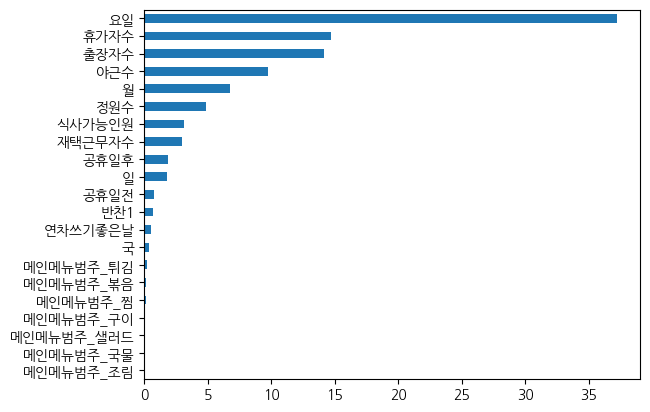

In [135]:
pd.DataFrame(
    lunch_model.feature_importances_, index=lunch_model.feature_names_
).sort_values(0).plot.barh(legend=False)

In [104]:
df_lunch_result = pd.DataFrame(lunch_result)
df_lunch_result

,params,cv_results
iterations,590.00,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
learning_rate,0.02,NaN
test-MAE-mean,NaN,"[872.1629022157555, 855.9063963131626, 839.842..."
test-MAE-std,NaN,"[26.508748591904933, 26.404274941331252, 26.18..."
train-MAE-mean,NaN,"[872.1767955743701, 855.8135610354454, 839.696..."
train-MAE-std,NaN,"[2.8858267585358193, 2.8334791342244814, 2.779..."
test-RMSE-mean,NaN,"[896.4755445284115, 880.4786885998362, 864.360..."
test-RMSE-std,NaN,"[26.331368066223497, 26.194851003616574, 25.97..."
train-RMSE-mean,NaN,"[896.819417944205, 880.684654607435, 864.50452..."
train-RMSE-std,NaN,"[2.8407423204627844, 2.7821485042892733, 2.728..."


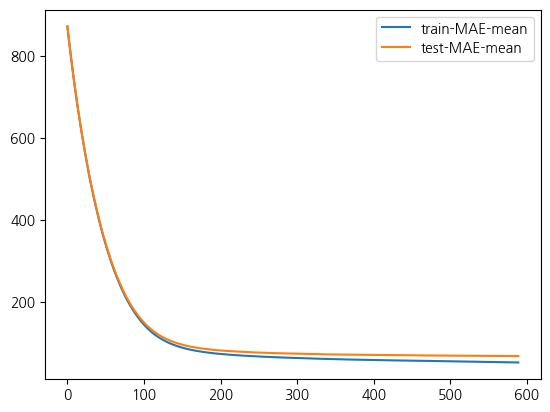

In [105]:
pd.DataFrame({
    'train-MAE-mean': df_lunch_result.loc['train-MAE-mean', 'cv_results'],
    'test-MAE-mean': df_lunch_result.loc['test-MAE-mean', 'cv_results']
}).plot();

### dinner model

In [106]:
dinner_model = catboost.CatBoostRegressor(
    eval_metric='MAE',
    random_state=42,
    logging_level='Silent',
    early_stopping_rounds=200
)

In [107]:
dinner_result = dinner_model.grid_search(
    param_grid=param_grid,
    X=X_train_dinner,
    y=y_train_dinner,
    cv=10
)
dinner_result

0:	loss: 76.1407307	best: 76.1407307 (0)	total: 292ms	remaining: 8m 40s
1:	loss: 55.9916658	best: 55.9916658 (1)	total: 571ms	remaining: 8m 27s
2:	loss: 52.9361528	best: 52.9361528 (2)	total: 949ms	remaining: 9m 22s
3:	loss: 50.5657266	best: 50.5657266 (3)	total: 1.3s	remaining: 9m 37s
4:	loss: 49.3956634	best: 49.3956634 (4)	total: 1.66s	remaining: 9m 50s
5:	loss: 48.7941036	best: 48.7941036 (5)	total: 2.03s	remaining: 10m
6:	loss: 48.9254342	best: 48.7941036 (5)	total: 2.33s	remaining: 9m 51s
7:	loss: 49.1771266	best: 48.7941036 (5)	total: 2.65s	remaining: 9m 46s
8:	loss: 49.4570883	best: 48.7941036 (5)	total: 2.98s	remaining: 9m 48s
9:	loss: 50.2367040	best: 48.7941036 (5)	total: 3.27s	remaining: 9m 39s
10:	loss: 48.9982540	best: 48.7941036 (5)	total: 3.56s	remaining: 9m 32s
11:	loss: 48.5658449	best: 48.5658449 (11)	total: 3.83s	remaining: 9m 25s
12:	loss: 49.1850821	best: 48.5658449 (11)	total: 4.11s	remaining: 9m 19s
13:	loss: 49.6745915	best: 48.5658449 (11)	total: 4.4s	remainin

112:	loss: 49.6745915	best: 48.5658449 (11)	total: 39.2s	remaining: 9m 39s
113:	loss: 48.6349737	best: 48.5658449 (11)	total: 39.8s	remaining: 9m 41s
114:	loss: 49.4188375	best: 48.5658449 (11)	total: 40.2s	remaining: 9m 42s
115:	loss: 49.7933278	best: 48.5658449 (11)	total: 40.7s	remaining: 9m 45s
116:	loss: 51.1640661	best: 48.5658449 (11)	total: 41.2s	remaining: 9m 45s
117:	loss: 49.7586744	best: 48.5658449 (11)	total: 41.7s	remaining: 9m 47s
118:	loss: 51.4778350	best: 48.5658449 (11)	total: 42s	remaining: 9m 47s
119:	loss: 51.4815566	best: 48.5658449 (11)	total: 42.3s	remaining: 9m 46s
120:	loss: 51.0768139	best: 48.5658449 (11)	total: 42.6s	remaining: 9m 45s
121:	loss: 52.8097167	best: 48.5658449 (11)	total: 43s	remaining: 9m 44s
122:	loss: 50.8832786	best: 48.5658449 (11)	total: 43.3s	remaining: 9m 43s
123:	loss: 51.1764626	best: 48.5658449 (11)	total: 43.6s	remaining: 9m 43s
124:	loss: 52.0073665	best: 48.5658449 (11)	total: 44.1s	remaining: 9m 44s
125:	loss: 52.0616339	best: 4

222:	loss: 51.1764626	best: 48.5658449 (11)	total: 1m 18s	remaining: 9m 10s
223:	loss: 52.0073665	best: 48.5658449 (11)	total: 1m 19s	remaining: 9m 9s
224:	loss: 52.0616339	best: 48.5658449 (11)	total: 1m 19s	remaining: 9m 8s
225:	loss: 52.7767539	best: 48.5658449 (11)	total: 1m 19s	remaining: 9m 8s
226:	loss: 53.5552131	best: 48.5658449 (11)	total: 1m 20s	remaining: 9m 8s
227:	loss: 52.3443691	best: 48.5658449 (11)	total: 1m 20s	remaining: 9m 8s
228:	loss: 50.7464860	best: 48.5658449 (11)	total: 1m 20s	remaining: 9m 7s
229:	loss: 51.7606171	best: 48.5658449 (11)	total: 1m 21s	remaining: 9m 7s
230:	loss: 51.6066112	best: 48.5658449 (11)	total: 1m 21s	remaining: 9m 6s
231:	loss: 52.5236925	best: 48.5658449 (11)	total: 1m 21s	remaining: 9m 6s
232:	loss: 52.5148310	best: 48.5658449 (11)	total: 1m 22s	remaining: 9m 5s
233:	loss: 50.7607900	best: 48.5658449 (11)	total: 1m 22s	remaining: 9m 5s
234:	loss: 51.7461736	best: 48.5658449 (11)	total: 1m 22s	remaining: 9m 5s
235:	loss: 52.6491442	be

330:	loss: 52.5236925	best: 48.4759323 (302)	total: 1m 57s	remaining: 8m 34s
331:	loss: 52.5148310	best: 48.4759323 (302)	total: 1m 57s	remaining: 8m 35s
332:	loss: 50.7607900	best: 48.4759323 (302)	total: 1m 58s	remaining: 8m 35s
333:	loss: 51.7461736	best: 48.4759323 (302)	total: 1m 58s	remaining: 8m 34s
334:	loss: 52.6491442	best: 48.4759323 (302)	total: 1m 59s	remaining: 8m 34s
335:	loss: 54.1351706	best: 48.4759323 (302)	total: 1m 59s	remaining: 8m 34s
336:	loss: 53.5415841	best: 48.4759323 (302)	total: 2m	remaining: 8m 34s
337:	loss: 50.6856956	best: 48.4759323 (302)	total: 2m	remaining: 8m 35s
338:	loss: 54.0155849	best: 48.4759323 (302)	total: 2m 1s	remaining: 8m 35s
339:	loss: 51.2028284	best: 48.4759323 (302)	total: 2m 1s	remaining: 8m 35s
340:	loss: 54.1033985	best: 48.4759323 (302)	total: 2m 1s	remaining: 8m 35s
341:	loss: 53.6478605	best: 48.4759323 (302)	total: 2m 2s	remaining: 8m 35s
342:	loss: 53.8179513	best: 48.4759323 (302)	total: 2m 2s	remaining: 8m 35s
343:	loss: 5

438:	loss: 51.2028284	best: 48.2841123 (400)	total: 2m 41s	remaining: 8m 15s
439:	loss: 54.1033985	best: 48.2841123 (400)	total: 2m 42s	remaining: 8m 14s
440:	loss: 53.6478605	best: 48.2841123 (400)	total: 2m 42s	remaining: 8m 13s
441:	loss: 53.8179513	best: 48.2841123 (400)	total: 2m 42s	remaining: 8m 13s
442:	loss: 53.3126175	best: 48.2841123 (400)	total: 2m 43s	remaining: 8m 14s
443:	loss: 54.2998373	best: 48.2841123 (400)	total: 2m 44s	remaining: 8m 14s
444:	loss: 56.0685389	best: 48.2841123 (400)	total: 2m 44s	remaining: 8m 14s
445:	loss: 55.9715892	best: 48.2841123 (400)	total: 2m 45s	remaining: 8m 14s
446:	loss: 53.1230728	best: 48.2841123 (400)	total: 2m 45s	remaining: 8m 14s
447:	loss: 54.2433736	best: 48.2841123 (400)	total: 2m 46s	remaining: 8m 14s
448:	loss: 52.9169341	best: 48.2841123 (400)	total: 2m 46s	remaining: 8m 14s
449:	loss: 52.8292406	best: 48.2841123 (400)	total: 2m 46s	remaining: 8m 13s
450:	loss: 54.4755452	best: 48.2841123 (400)	total: 2m 46s	remaining: 8m 12s

547:	loss: 52.9169341	best: 48.2182840 (499)	total: 3m 29s	remaining: 7m 52s
548:	loss: 52.8292406	best: 48.2182840 (499)	total: 3m 29s	remaining: 7m 51s
549:	loss: 54.4755452	best: 48.2182840 (499)	total: 3m 30s	remaining: 7m 51s
550:	loss: 54.3193314	best: 48.2182840 (499)	total: 3m 30s	remaining: 7m 50s
551:	loss: 52.6017580	best: 48.2182840 (499)	total: 3m 31s	remaining: 7m 50s
552:	loss: 55.0770860	best: 48.2182840 (499)	total: 3m 31s	remaining: 7m 50s
553:	loss: 53.4745755	best: 48.2182840 (499)	total: 3m 31s	remaining: 7m 49s
554:	loss: 54.5757591	best: 48.2182840 (499)	total: 3m 32s	remaining: 7m 49s
555:	loss: 54.9778228	best: 48.2182840 (499)	total: 3m 32s	remaining: 7m 49s
556:	loss: 56.6367857	best: 48.2182840 (499)	total: 3m 33s	remaining: 7m 49s
557:	loss: 53.7145799	best: 48.2182840 (499)	total: 3m 33s	remaining: 7m 49s
558:	loss: 51.6128222	best: 48.2182840 (499)	total: 3m 34s	remaining: 7m 48s
559:	loss: 56.1517886	best: 48.2182840 (499)	total: 3m 34s	remaining: 7m 48s

654:	loss: 54.9778228	best: 48.1846069 (598)	total: 4m 8s	remaining: 7m 7s
655:	loss: 56.6367857	best: 48.1846069 (598)	total: 4m 8s	remaining: 7m 6s
656:	loss: 53.7145799	best: 48.1846069 (598)	total: 4m 8s	remaining: 7m 6s
657:	loss: 51.6128222	best: 48.1846069 (598)	total: 4m 9s	remaining: 7m 5s
658:	loss: 56.1517886	best: 48.1846069 (598)	total: 4m 9s	remaining: 7m 5s
659:	loss: 53.6709956	best: 48.1846069 (598)	total: 4m 9s	remaining: 7m 4s
660:	loss: 53.8420646	best: 48.1846069 (598)	total: 4m 10s	remaining: 7m 4s
661:	loss: 52.0906378	best: 48.1846069 (598)	total: 4m 10s	remaining: 7m 4s
662:	loss: 58.6508944	best: 48.1846069 (598)	total: 4m 11s	remaining: 7m 3s
663:	loss: 53.4984827	best: 48.1846069 (598)	total: 4m 11s	remaining: 7m 3s
664:	loss: 58.6326049	best: 48.1846069 (598)	total: 4m 11s	remaining: 7m 3s
665:	loss: 56.2208273	best: 48.1846069 (598)	total: 4m 12s	remaining: 7m 2s
666:	loss: 58.4044537	best: 48.1846069 (598)	total: 4m 12s	remaining: 7m 2s
667:	loss: 53.0248

763:	loss: 58.6326049	best: 48.0268371 (696)	total: 5m 8s	remaining: 6m 51s
764:	loss: 56.2208273	best: 48.0268371 (696)	total: 5m 9s	remaining: 6m 50s
765:	loss: 58.4044537	best: 48.0268371 (696)	total: 5m 9s	remaining: 6m 50s
766:	loss: 53.0248229	best: 48.0268371 (696)	total: 5m 10s	remaining: 6m 50s
767:	loss: 53.7630414	best: 48.0268371 (696)	total: 5m 10s	remaining: 6m 49s
768:	loss: 52.9743776	best: 48.0268371 (696)	total: 5m 10s	remaining: 6m 49s
769:	loss: 54.1855108	best: 48.0268371 (696)	total: 5m 10s	remaining: 6m 48s
770:	loss: 54.7707193	best: 48.0268371 (696)	total: 5m 11s	remaining: 6m 48s
771:	loss: 54.9439914	best: 48.0268371 (696)	total: 5m 11s	remaining: 6m 47s
772:	loss: 55.6012629	best: 48.0268371 (696)	total: 5m 11s	remaining: 6m 46s
773:	loss: 55.6028019	best: 48.0268371 (696)	total: 5m 12s	remaining: 6m 46s
774:	loss: 54.7725094	best: 48.0268371 (696)	total: 5m 12s	remaining: 6m 45s
775:	loss: 54.0085132	best: 48.0268371 (696)	total: 5m 12s	remaining: 6m 45s
77

870:	loss: 54.9439914	best: 47.9335133 (795)	total: 5m 49s	remaining: 6m 5s
871:	loss: 55.6012629	best: 47.9335133 (795)	total: 5m 49s	remaining: 6m 4s
872:	loss: 55.6028019	best: 47.9335133 (795)	total: 5m 49s	remaining: 6m 4s
873:	loss: 54.7725094	best: 47.9335133 (795)	total: 5m 49s	remaining: 6m 3s
874:	loss: 54.0085132	best: 47.9335133 (795)	total: 5m 50s	remaining: 6m 2s
875:	loss: 54.6737550	best: 47.9335133 (795)	total: 5m 50s	remaining: 6m 2s
876:	loss: 56.0709662	best: 47.9335133 (795)	total: 5m 50s	remaining: 6m 1s
877:	loss: 56.7635745	best: 47.9335133 (795)	total: 5m 50s	remaining: 6m 1s
878:	loss: 57.3273904	best: 47.9335133 (795)	total: 5m 51s	remaining: 6m
879:	loss: 58.5791277	best: 47.9335133 (795)	total: 5m 51s	remaining: 6m
880:	loss: 60.3188389	best: 47.9335133 (795)	total: 5m 51s	remaining: 5m 59s
881:	loss: 59.3317036	best: 47.9335133 (795)	total: 5m 52s	remaining: 5m 59s
882:	loss: 58.2916799	best: 47.9335133 (795)	total: 5m 52s	remaining: 5m 58s
883:	loss: 56.1

977:	loss: 57.3273904	best: 47.9052921 (894)	total: 6m 32s	remaining: 5m 22s
978:	loss: 58.5791277	best: 47.9052921 (894)	total: 6m 32s	remaining: 5m 21s
979:	loss: 60.3188389	best: 47.9052921 (894)	total: 6m 32s	remaining: 5m 21s
980:	loss: 59.3317036	best: 47.9052921 (894)	total: 6m 33s	remaining: 5m 20s
981:	loss: 58.2916799	best: 47.9052921 (894)	total: 6m 33s	remaining: 5m 20s
982:	loss: 56.1505236	best: 47.9052921 (894)	total: 6m 33s	remaining: 5m 20s
983:	loss: 58.5083580	best: 47.9052921 (894)	total: 6m 34s	remaining: 5m 19s
984:	loss: 54.7613338	best: 47.9052921 (894)	total: 6m 34s	remaining: 5m 19s
985:	loss: 54.7840275	best: 47.9052921 (894)	total: 6m 34s	remaining: 5m 18s
986:	loss: 56.7822487	best: 47.9052921 (894)	total: 6m 35s	remaining: 5m 18s
987:	loss: 57.2885676	best: 47.9052921 (894)	total: 6m 35s	remaining: 5m 17s
988:	loss: 58.2031380	best: 47.9052921 (894)	total: 6m 35s	remaining: 5m 17s
989:	loss: 59.0592216	best: 47.9052921 (894)	total: 6m 35s	remaining: 5m 16s

1084:	loss: 54.7840275	best: 47.8258215 (993)	total: 7m 9s	remaining: 4m 35s
1085:	loss: 56.7822487	best: 47.8258215 (993)	total: 7m 9s	remaining: 4m 35s
1086:	loss: 57.2885676	best: 47.8258215 (993)	total: 7m 9s	remaining: 4m 34s
1087:	loss: 58.2031380	best: 47.8258215 (993)	total: 7m 9s	remaining: 4m 34s
1088:	loss: 59.0592216	best: 47.8258215 (993)	total: 7m 10s	remaining: 4m 33s
1089:	loss: 56.0074897	best: 47.8258215 (993)	total: 7m 10s	remaining: 4m 33s
1090:	loss: 50.9081072	best: 47.8258215 (993)	total: 7m 11s	remaining: 4m 33s
1091:	loss: 48.5390387	best: 47.8258215 (993)	total: 7m 11s	remaining: 4m 32s
1092:	loss: 47.7787126	best: 47.7787126 (1092)	total: 7m 12s	remaining: 4m 32s
1093:	loss: 48.1386067	best: 47.7787126 (1092)	total: 7m 12s	remaining: 4m 32s
1094:	loss: 48.4759323	best: 47.7787126 (1092)	total: 7m 13s	remaining: 4m 31s
1095:	loss: 48.5449221	best: 47.7787126 (1092)	total: 7m 14s	remaining: 4m 31s
1096:	loss: 48.9355942	best: 47.7787126 (1092)	total: 7m 14s	rem

1189:	loss: 50.5882466	best: 47.7787126 (1092)	total: 7m 45s	remaining: 3m 51s
1190:	loss: 48.4639498	best: 47.7787126 (1092)	total: 7m 46s	remaining: 3m 51s
1191:	loss: 47.7426492	best: 47.7426492 (1191)	total: 7m 46s	remaining: 3m 51s
1192:	loss: 48.1386067	best: 47.7426492 (1191)	total: 7m 47s	remaining: 3m 50s
1193:	loss: 48.4759323	best: 47.7426492 (1191)	total: 7m 48s	remaining: 3m 50s
1194:	loss: 48.5449221	best: 47.7426492 (1191)	total: 7m 48s	remaining: 3m 50s
1195:	loss: 48.9355942	best: 47.7426492 (1191)	total: 7m 49s	remaining: 3m 49s
1196:	loss: 49.4570883	best: 47.7426492 (1191)	total: 7m 49s	remaining: 3m 49s
1197:	loss: 50.2367040	best: 47.7426492 (1191)	total: 7m 50s	remaining: 3m 49s
1198:	loss: 48.9982540	best: 47.7426492 (1191)	total: 7m 50s	remaining: 3m 48s
1199:	loss: 48.5658449	best: 47.7426492 (1191)	total: 7m 51s	remaining: 3m 48s
1200:	loss: 49.1850821	best: 47.7426492 (1191)	total: 7m 51s	remaining: 3m 48s
1201:	loss: 49.6745915	best: 47.7426492 (1191)	total

1294:	loss: 48.9355942	best: 47.6069774 (1290)	total: 8m 24s	remaining: 3m 9s
1295:	loss: 49.4570883	best: 47.6069774 (1290)	total: 8m 25s	remaining: 3m 9s
1296:	loss: 50.2367040	best: 47.6069774 (1290)	total: 8m 25s	remaining: 3m 9s
1297:	loss: 48.9982540	best: 47.6069774 (1290)	total: 8m 26s	remaining: 3m 8s
1298:	loss: 48.5658449	best: 47.6069774 (1290)	total: 8m 27s	remaining: 3m 8s
1299:	loss: 49.1850821	best: 47.6069774 (1290)	total: 8m 27s	remaining: 3m 8s
1300:	loss: 49.6745915	best: 47.6069774 (1290)	total: 8m 27s	remaining: 3m 7s
1301:	loss: 48.6349737	best: 47.6069774 (1290)	total: 8m 28s	remaining: 3m 7s
1302:	loss: 49.4188375	best: 47.6069774 (1290)	total: 8m 28s	remaining: 3m 6s
1303:	loss: 49.7933278	best: 47.6069774 (1290)	total: 8m 29s	remaining: 3m 6s
1304:	loss: 51.1640661	best: 47.6069774 (1290)	total: 8m 29s	remaining: 3m 6s
1305:	loss: 49.7586744	best: 47.6069774 (1290)	total: 8m 29s	remaining: 3m 5s
1306:	loss: 51.4778350	best: 47.6069774 (1290)	total: 8m 30s	rem

1399:	loss: 49.6745915	best: 47.5639053 (1389)	total: 9m 3s	remaining: 2m 28s
1400:	loss: 48.6349737	best: 47.5639053 (1389)	total: 9m 4s	remaining: 2m 28s
1401:	loss: 49.4188375	best: 47.5639053 (1389)	total: 9m 4s	remaining: 2m 27s
1402:	loss: 49.7933278	best: 47.5639053 (1389)	total: 9m 5s	remaining: 2m 27s
1403:	loss: 51.1640661	best: 47.5639053 (1389)	total: 9m 5s	remaining: 2m 26s
1404:	loss: 49.7586744	best: 47.5639053 (1389)	total: 9m 5s	remaining: 2m 26s
1405:	loss: 51.4778350	best: 47.5639053 (1389)	total: 9m 6s	remaining: 2m 26s
1406:	loss: 51.4815566	best: 47.5639053 (1389)	total: 9m 6s	remaining: 2m 25s
1407:	loss: 51.0768139	best: 47.5639053 (1389)	total: 9m 6s	remaining: 2m 25s
1408:	loss: 52.8097167	best: 47.5639053 (1389)	total: 9m 7s	remaining: 2m 24s
1409:	loss: 50.8832786	best: 47.5639053 (1389)	total: 9m 7s	remaining: 2m 24s
1410:	loss: 51.1764626	best: 47.5639053 (1389)	total: 9m 7s	remaining: 2m 24s
1411:	loss: 52.0073665	best: 47.5639053 (1389)	total: 9m 8s	rema

1504:	loss: 51.4778350	best: 47.5639053 (1389)	total: 9m 42s	remaining: 1m 47s
1505:	loss: 51.4815566	best: 47.5639053 (1389)	total: 9m 42s	remaining: 1m 46s
1506:	loss: 51.0768139	best: 47.5639053 (1389)	total: 9m 43s	remaining: 1m 46s
1507:	loss: 52.8097167	best: 47.5639053 (1389)	total: 9m 43s	remaining: 1m 46s
1508:	loss: 50.8832786	best: 47.5639053 (1389)	total: 9m 43s	remaining: 1m 45s
1509:	loss: 51.1764626	best: 47.5639053 (1389)	total: 9m 44s	remaining: 1m 45s
1510:	loss: 52.0073665	best: 47.5639053 (1389)	total: 9m 44s	remaining: 1m 44s
1511:	loss: 52.0616339	best: 47.5639053 (1389)	total: 9m 44s	remaining: 1m 44s
1512:	loss: 52.7767539	best: 47.5639053 (1389)	total: 9m 45s	remaining: 1m 44s
1513:	loss: 53.5552131	best: 47.5639053 (1389)	total: 9m 45s	remaining: 1m 43s
1514:	loss: 52.3443691	best: 47.5639053 (1389)	total: 9m 45s	remaining: 1m 43s
1515:	loss: 50.7464860	best: 47.5639053 (1389)	total: 9m 46s	remaining: 1m 42s
1516:	loss: 51.7606171	best: 47.5639053 (1389)	total

1608:	loss: 51.1764626	best: 47.5639053 (1389)	total: 10m 18s	remaining: 1m 6s
1609:	loss: 52.0073665	best: 47.5639053 (1389)	total: 10m 18s	remaining: 1m 6s
1610:	loss: 52.0616339	best: 47.5639053 (1389)	total: 10m 18s	remaining: 1m 5s
1611:	loss: 52.7767539	best: 47.5639053 (1389)	total: 10m 19s	remaining: 1m 5s
1612:	loss: 53.5552131	best: 47.5639053 (1389)	total: 10m 20s	remaining: 1m 4s
1613:	loss: 52.3443691	best: 47.5639053 (1389)	total: 10m 20s	remaining: 1m 4s
1614:	loss: 50.7464860	best: 47.5639053 (1389)	total: 10m 21s	remaining: 1m 4s
1615:	loss: 51.7606171	best: 47.5639053 (1389)	total: 10m 21s	remaining: 1m 3s
1616:	loss: 51.6066112	best: 47.5639053 (1389)	total: 10m 22s	remaining: 1m 3s
1617:	loss: 52.5236925	best: 47.5639053 (1389)	total: 10m 22s	remaining: 1m 3s
1618:	loss: 52.5148310	best: 47.5639053 (1389)	total: 10m 22s	remaining: 1m 2s
1619:	loss: 50.7607900	best: 47.5639053 (1389)	total: 10m 23s	remaining: 1m 2s
1620:	loss: 51.7461736	best: 47.5639053 (1389)	total

1713:	loss: 50.7464860	best: 47.5639053 (1389)	total: 11m 1s	remaining: 26.3s
1714:	loss: 51.7606171	best: 47.5639053 (1389)	total: 11m 2s	remaining: 25.9s
1715:	loss: 51.6066112	best: 47.5639053 (1389)	total: 11m 2s	remaining: 25.5s
1716:	loss: 52.5236925	best: 47.5639053 (1389)	total: 11m 2s	remaining: 25.1s
1717:	loss: 52.5148310	best: 47.5639053 (1389)	total: 11m 3s	remaining: 24.7s
1718:	loss: 50.7607900	best: 47.5639053 (1389)	total: 11m 3s	remaining: 24.3s
1719:	loss: 51.7461736	best: 47.5639053 (1389)	total: 11m 3s	remaining: 23.9s
1720:	loss: 52.6491442	best: 47.5639053 (1389)	total: 11m 3s	remaining: 23.5s
1721:	loss: 54.1351706	best: 47.5639053 (1389)	total: 11m 4s	remaining: 23.1s
1722:	loss: 53.5415841	best: 47.5639053 (1389)	total: 11m 4s	remaining: 22.8s
1723:	loss: 50.6856956	best: 47.5639053 (1389)	total: 11m 5s	remaining: 22.4s
1724:	loss: 54.0155849	best: 47.5639053 (1389)	total: 11m 5s	remaining: 22s
1725:	loss: 51.2028284	best: 47.5639053 (1389)	total: 11m 5s	remai

{'params': {'iterations': 530, 'learning_rate': 0.04},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               

In [108]:
dinner_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MAE',
 'iterations': 530,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'od_wait': 200,
 'random_seed': 42,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learni

In [109]:
dinner_model.feature_names_

['월',
 '일',
 '요일',
 '공휴일전',
 '공휴일후',
 '연차쓰기좋은날',
 '식사가능인원',
 '야근수',
 '휴가자수',
 '재택근무자수',
 '출장자수',
 '반찬1',
 '국',
 '메인메뉴범주_볶음']

In [136]:
dinner_model.feature_importances_

array([ 9.00428912,  4.88509   ,  1.19214279, 12.54759887,  4.2822678 ,
        1.60283328, 27.46326444,  0.36827375,  1.03078519,  4.45240877,
        3.9983843 ,  1.42118809,  9.60187272,  4.58440819,  0.242511  ,
        0.24388804,  0.39270201,  0.28485125, 11.88153852,  0.23361581,
        0.13675875,  0.1493273 ])

In [137]:
pd.DataFrame(
    dinner_model.feature_importances_, index=dinner_model.feature_names_
).sort_values(0)

,0
메인메뉴범주_튀김,0.136759
메인메뉴범주_샐러드,0.149327
메인메뉴범주_볶음,0.233616
메인메뉴범주_국물,0.242511
메인메뉴범주_구이,0.243888
메인메뉴범주_찜,0.284851
공휴일후,0.368274
메인메뉴범주_조림,0.392702
국,1.030785
공휴일전,1.192143


<AxesSubplot:>

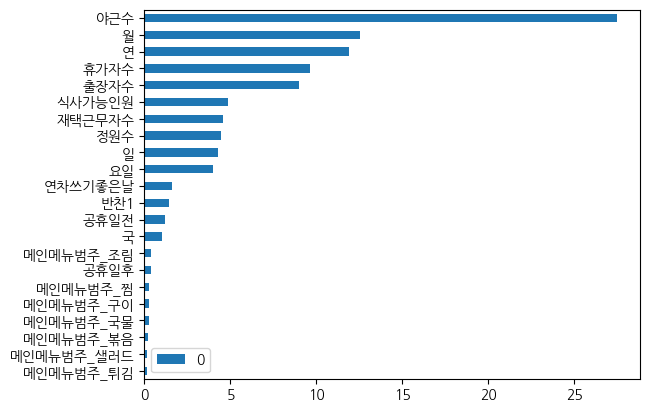

In [118]:
pd.DataFrame(
    dinner_model.feature_importances_, index=dinner_model.feature_names_
).sort_values(0).plot.barh()

In [112]:
df_dinner_result = pd.DataFrame(dinner_result)
df_dinner_result

,params,cv_results
iterations,530.00,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
learning_rate,0.04,NaN
test-MAE-mean,NaN,"[462.0453451642873, 444.85888400690726, 428.75..."
test-MAE-std,NaN,"[11.258089775439116, 11.22723393462618, 11.241..."
train-MAE-mean,NaN,"[462.0489930854452, 444.7956402419337, 428.541..."
train-MAE-std,NaN,"[1.2155616598079382, 1.170509246096238, 1.1312..."
test-RMSE-mean,NaN,"[474.455517475201, 457.516427742103, 441.70512..."
test-RMSE-std,NaN,"[10.276871341232043, 10.244379846794939, 10.21..."
train-RMSE-mean,NaN,"[474.54647939957266, 457.51916463322686, 441.5..."
train-RMSE-std,NaN,"[1.0961277579748208, 1.0510785954139172, 1.009..."


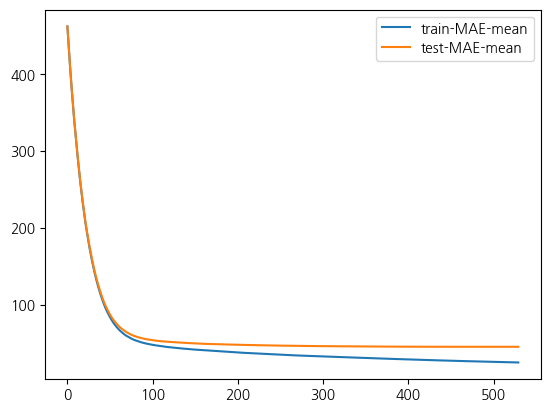

In [113]:
pd.DataFrame({
    'train-MAE-mean': df_dinner_result.loc['train-MAE-mean', 'cv_results'],
    'test-MAE-mean': df_dinner_result.loc['test-MAE-mean', 'cv_results']
}).plot();

### 테스트 데이터 학습

In [114]:
lunch_model.fit(train_lunch.drop(columns=label_lunch), train_lunch[label_lunch])

In [115]:
dinner_model.fit(train_dinner.drop(columns=label_dinner), train_dinner[label_dinner])

### 테스트 데이터 학습 검증

In [150]:
lunch_test_pred = lunch_model.predict(X_test_lunch)

CatBoostError: catboost/libs/data/model_dataset_compatibility.cpp:81: At position 0 should be feature with name 정원수 (found 월).

In [ ]:
dinner_test_pred = dinner_model.predict(X_test_dinner)

In [ ]:
lunch_test_mae = mean_absolute_error(lunch_test_pred, y_test_lunch)
lunch_test_mae

In [ ]:
dinner_test_mae = mean_absolute_error(dinner_test_pred, y_test_dinner)
dinner_test_mae

### 예측

In [124]:
lunch_pred = lunch_model.predict(test_lunch)
lunch_pred[:5]

array([ 983.3056869 ,  906.60427568,  632.53507743, 1199.07029148,
       1005.0024705 ])

In [125]:
len(lunch_pred)

50

In [126]:
round_lunch_pred = lunch_pred.round()
round_lunch_pred[:5]

array([ 983.,  907.,  633., 1199., 1005.])

In [127]:
dinner_pred = dinner_model.predict(test_dinner)
dinner_pred[:5]

array([371.92983309, 420.02603503, 268.70014437, 551.71748014,
       471.93444647])

In [130]:
len(dinner_pred)

50

In [129]:
round_dinner_pred = dinner_pred.round()
round_dinner_pred[:5]

array([372., 420., 269., 552., 472.])

### 제출

In [138]:
sub = pd.read_csv('./sub/sample_submission.csv')

In [139]:
sub.shape

(50, 3)

In [140]:
sub.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [141]:
sub['중식계'] = round_lunch_pred

In [142]:
sub['석식계'] = round_dinner_pred

In [143]:
sub.shape

(50, 3)

In [144]:
sub.head()

,일자,중식계,석식계
0,2021-01-27,983.0,372.0
1,2021-01-28,907.0,420.0
2,2021-01-29,633.0,269.0
3,2021-02-01,1199.0,552.0
4,2021-02-02,1005.0,472.0


In [145]:
sub[['중식계', '석식계']] = sub[['중식계', '석식계']].astype(int)

In [146]:
sub.shape

(50, 3)

In [147]:
sub.head()

,일자,중식계,석식계
0,2021-01-27,983,372
1,2021-01-28,907,420
2,2021-01-29,633,269
3,2021-02-01,1199,552
4,2021-02-02,1005,472


In [148]:
file_name = f'./sub/FINAL_L{lunch_test_mae:.3f}_D{dinner_test_mae:.3f}.csv'
file_name

'./sub/FINAL_L50.242_D19.753.csv'

In [149]:
sub.to_csv(file_name, index=False)